In [263]:
import pandas as pd
from matplotlib import pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
from sklearn.preprocessing import LabelEncoder

# Data preparing

In [264]:
data = pd.read_csv('./data/data.csv')
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate
0,Albania,2012,2.404087,12319.779604,-4.430218,Apples,369.7,3.2
1,Albania,2012,2.404087,12319.779604,-4.430218,Apricots,489.9,3.2
2,Albania,2012,2.404087,12319.779604,-4.430218,Barley,316.1,3.2
3,Albania,2012,2.404087,12319.779604,-4.430218,"Beans, dry",1562.2,3.2
4,Albania,2012,2.404087,12319.779604,-4.430218,Cabbages,203.4,3.2
...,...,...,...,...,...,...,...,...
15644,Switzerland,2022,1.661019,818426.550206,0.616880,Tomatoes,3407.9,2.7
15645,Switzerland,2022,1.661019,818426.550206,0.616880,Triticale,362.4,2.7
15646,Switzerland,2022,1.661019,818426.550206,0.616880,Unmanufactured tobacco,16495.0,2.7
15647,Switzerland,2022,1.661019,818426.550206,0.616880,"Walnuts, in shell",3498.0,2.7


In [265]:
data['Difference of inflation'] = data['Food Inflation Rate'] - data['Overall Inflation Rate']

In [266]:
mean_value = data['Difference of inflation'].mean()
std_dev = data['Difference of inflation'].std()
mean_value, std_dev

(0.6515898678563061, 1.8824104304769325)

In [267]:
threshold = mean_value + std_dev

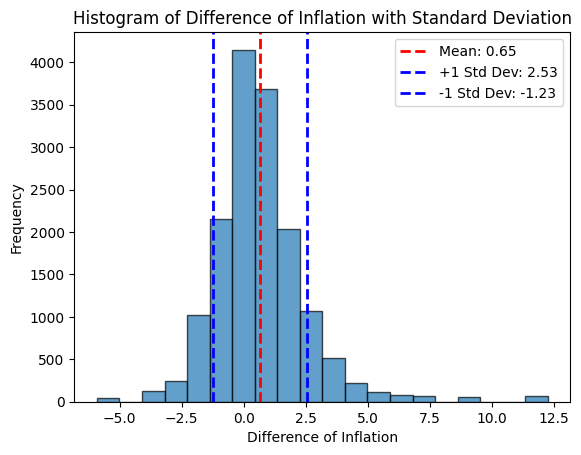

In [268]:
plt.hist(data['Difference of inflation'], bins=20, edgecolor='black', alpha=0.7)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='blue', linestyle='dashed', linewidth=2,
            label=f'+1 Std Dev: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='blue', linestyle='dashed', linewidth=2,
            label=f'-1 Std Dev: {mean_value - std_dev:.2f}')

plt.title('Histogram of Difference of Inflation with Standard Deviation')
plt.xlabel('Difference of Inflation')
plt.ylabel('Frequency')

plt.legend()

plt.show()

In [269]:
data['label'] = data['Difference of inflation'].apply(lambda x: 1 if x > threshold else 0)

In [270]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,Albania,2012,2.404087,12319.779604,-4.430218,Apples,369.7,3.2,-0.795913,0
1,Albania,2012,2.404087,12319.779604,-4.430218,Apricots,489.9,3.2,-0.795913,0
2,Albania,2012,2.404087,12319.779604,-4.430218,Barley,316.1,3.2,-0.795913,0
3,Albania,2012,2.404087,12319.779604,-4.430218,"Beans, dry",1562.2,3.2,-0.795913,0
4,Albania,2012,2.404087,12319.779604,-4.430218,Cabbages,203.4,3.2,-0.795913,0


In [271]:
numerical_columns=['Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate','Item Price Per Tonne', 'Overall Inflation Rate', 'Difference of inflation']

Uncomment this code for encoding with binary encoder

In [272]:
# binary_encoder = ce.BinaryEncoder(cols=['Item', 'Area'])
# data = binary_encoder.fit_transform(data)

Uncomment this code for encoding with label encoder

In [273]:
label_encoder = LabelEncoder()
data['Item'] = label_encoder.fit_transform(data['Item'])
data['Area'] = label_encoder.fit_transform(data['Area'])
numerical_columns.append('Item')
numerical_columns.append('Area')

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [274]:
scaler = RobustScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [275]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,-0.941176,2012,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691,0
1,-0.941176,2012,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691,0
2,-0.941176,2012,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691,0
3,-0.941176,2012,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691,0
4,-0.941176,2012,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691,0


# Model training and evaluation

Remove 'Difference of inflation' if needed

In [276]:
X, Y = data.drop(columns=['label', 'Difference of inflation']), data['label']

classifier = RandomForestClassifier(
    n_estimators=30,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_pred, y_test))

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_d

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2840
           1       0.67      0.90      0.77       290

    accuracy                           0.95      3130
   macro avg       0.83      0.93      0.87      3130
weighted avg       0.96      0.95      0.95      3130



C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_d

In [277]:
y_test.value_counts()

label
0    2738
1     392
Name: count, dtype: int64

# SHAP explainability

In [285]:
import numpy as np

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

explanation = explainer(x_test)

ValueError: operands could not be broadcast together with shapes (3130,2) (3130,) 

The following plots and graphs illustrate the reasoning behind the model's decision to assign a label of 1, indicating that food fraud has been detected in a specific area and year. While these visualizations are focused on the label of 1, the insights they provide can be similarly interpreted for cases where the label is 0, as the reasoning will be analogous. Therefore, we have chosen to execute them primarily for the label of 1. The SHAP values are retrieved based on the values in x_test, since this is the part of the dataset predictions are made on.

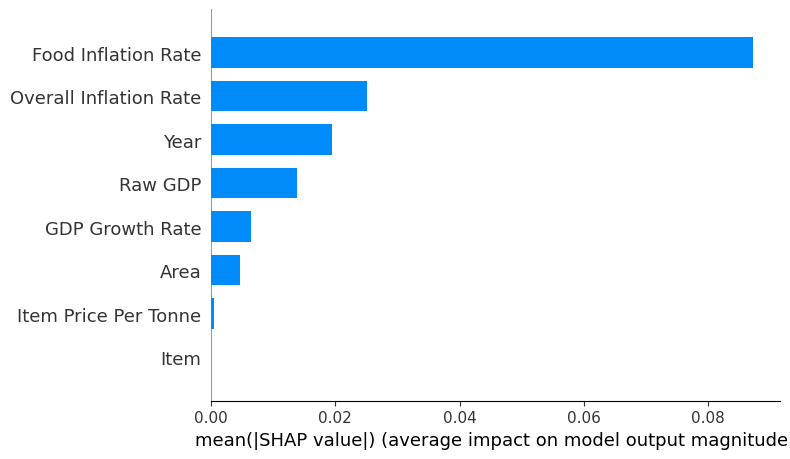

In [279]:
shap.summary_plot(shap_values[:, :, 1], x_test, plot_type="bar")

The plot above shows the average impact of each feature on the model output. The results were expected, since these two columns provide the most information when it comes to detecting food fraud. However, this plot is based on the absolute SHAP values, not taking into account whether the features affect the model output positively or negatively.

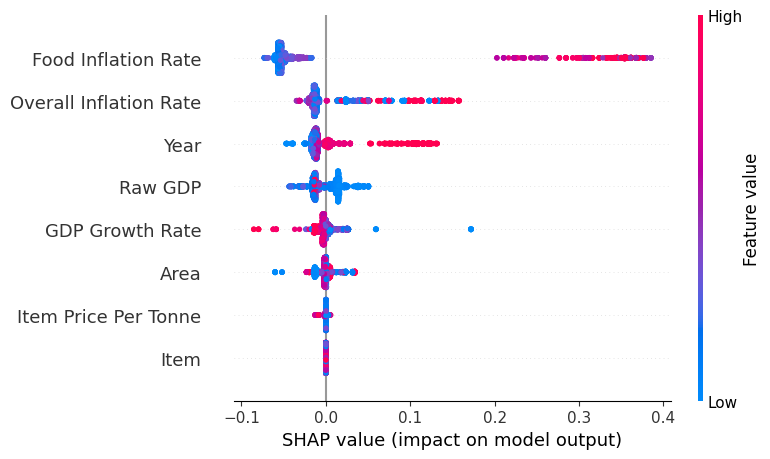

In [280]:
shap.summary_plot(shap_values[:, :, 1], x_test)

This plot also visualizes the impact of each feature on the model's output, showing how each feature contributes to the prediction. Additionally, it highlights the most important features, their direction (positive or negative impact), and the distribution of SHAP values across all samples.

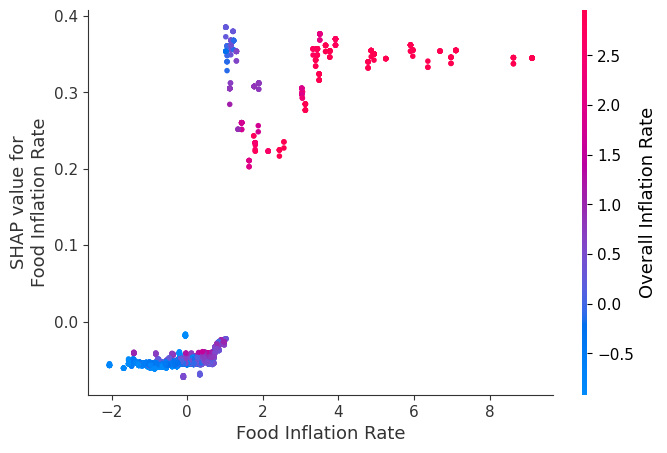

In [315]:
shap.dependence_plot('Food Inflation Rate', shap_values[:, :, 1], x_test)

This graph indicates that higher food inflation rate values have a greater impact on the model output (higher SHAP value) when combined with higher overall inflation rate values. This means that the overall inflation rate has an impact on the SHAP value for food inflation rate, hence this is a transitive indication of how overall inflation rate influences the model output.

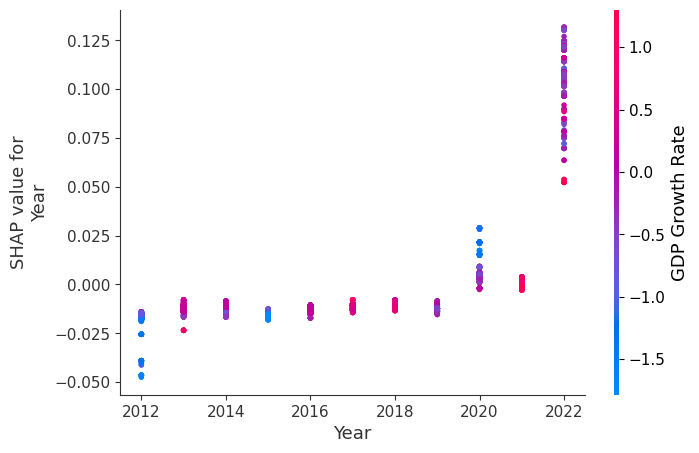

In [319]:
shap.dependence_plot(1, shap_values[:, :, 1], x_test)

This graph indicates that:
* 2012-2019: SHAP values were low, and GDP growth rates (mostly neutral to slightly positive) had little to no impact on the model.
* Around 2020: The plot shows mixed GDP growth rates, with more blue points (negative GDP growth rate), corresponding to increased   SHAP values due to economic volatility during the COVID-19 pandemic.
* 2021-2022: SHAP values peak, with mixed GDP growth rates strongly influencing the model, suggesting these years were particularly  significant, likely due to other factors like higher inflation rates.

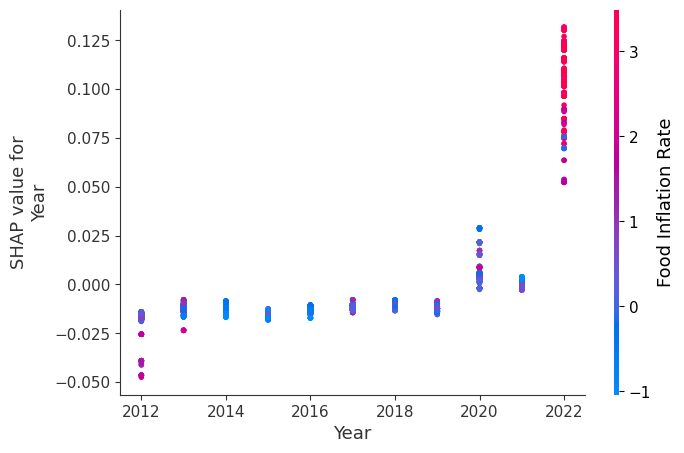

In [327]:
shap.dependence_plot('Year', shap_values[:, :, 1], x_test, interaction_index="Food Inflation Rate")

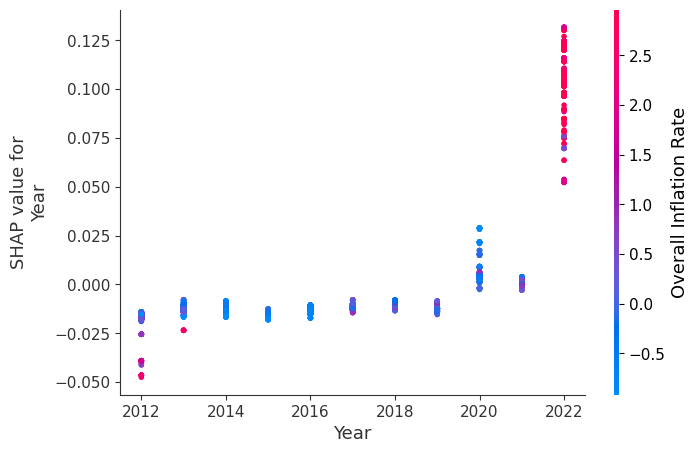

In [328]:
shap.dependence_plot('Year', shap_values[:, :, 1], x_test, interaction_index="Overall Inflation Rate")

This graph confirms what we noticed before. In 2022, the year had a big influence on the model’s output, largely due to the high Food Inflation Rate and Overall Inflation Rate, as shown in the two graphs above.

In [ ]:
# background_data = shap.sample(x_train, 10)
# # background_data = shap.kmeans(x_train2, 10)
# explainer = shap.KernelExplainer(classifier.predict_proba, background_data)
# shap_values = explainer.shap_values(x_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], x_test)